# API 8: Regularization

Regularization helps interpretability by making KANs sparser. This may require some hyperparamter tuning. Let's see how hyperparameters can affect training

Load KAN and create_dataset

In [1]:
from kan import *
import torch

f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

We apply L1 regularization to which tensor? Currently, we support five choices for reg_metric:
* 'edge_forward_spline_n': the "norm" of edge, normalized (output std/input std), only consider the spline (ignorning symbolic)
* 'edge_forward_sum': the "norm" of edge, normamlized (output std/input std), including both spline + symbolic
* 'edge_forward_spline_u': the "norm" of edge, unnormalized (output std), only consider the spline (ignorning symbolic)
* 'edge_backward': edge attribution score
* 'node_backward': node attribution score

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.20e-02 | test_loss: 3.11e-02 | reg: 6.97e+00 | : 100%|█| 20/20 [00:11<00:00,  1.79it


saving model version 0.1


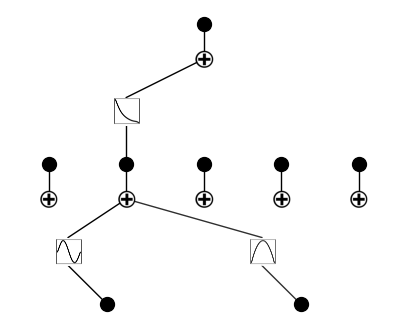

In [6]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=2)
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, reg_metric='edge_forward_spline_n'); # default
#model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, reg_metric='edge_forward_sum');
#model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, reg_metric='edge_forward_spline_u'); 
#model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, reg_metric='edge_backward');
#model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, reg_metric='node_backward');
model.plot()

Note: To plot the KAN diagram, there are also three options
* forward_u: same as edge_forward_spline_u
* forward_n: same as edge_forward_spline_u
* backward: same as edge_backward

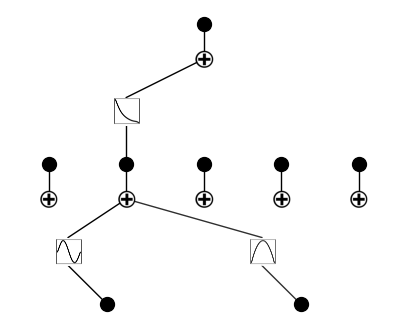

In [8]:
model.plot(metric='forward_u')
#model.plot(metric='forward_n')
#model.plot(metric='backward') # default